# Data Loading

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
#pd.options.display.max_rows = 20
pd.options.display.max_columns = None

In [8]:
pwd = os.getcwd()
train_path = os.path.join(pwd,'data','train.csv')
train = pd.read_csv(train_path)

test_path = os.path.join(pwd, 'data', 'test.csv')
test = pd.read_csv(test_path)

In [9]:
y = train['target']
train_id = train['id']
test_id = test['id']
cols = train.columns

In [10]:
test.drop(columns='id', inplace=True)
train.drop(columns='id', inplace=True)

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
cont1,300000.0,0.506873,0.203976,-0.082263,0.343078,0.484005,0.643789,1.016227
cont2,300000.0,0.497898,0.228159,-0.031397,0.319170,0.553209,0.731263,0.859697
cont3,300000.0,0.521557,0.200770,0.020967,0.344096,0.551471,0.648315,1.006955
cont4,300000.0,0.515683,0.233035,0.152761,0.294935,0.482880,0.748705,1.010402
cont5,300000.0,0.502022,0.220701,0.276377,0.284108,0.451733,0.670660,1.034261
cont6,300000.0,0.526515,0.217909,0.066166,0.356163,0.470988,0.694043,1.043858
cont7,300000.0,0.487890,0.181096,-0.097666,0.346600,0.466825,0.581292,1.066167
cont8,300000.0,0.525163,0.216221,0.217260,0.341486,0.483460,0.685250,1.024427
cont9,300000.0,0.459857,0.196685,-0.240604,0.330832,0.416843,0.575041,1.004114
cont10,300000.0,0.520532,0.201854,-0.085046,0.375465,0.458877,0.700292,1.199951


# Data visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
cols_to_plot = cols[1:15]

<AxesSubplot:>

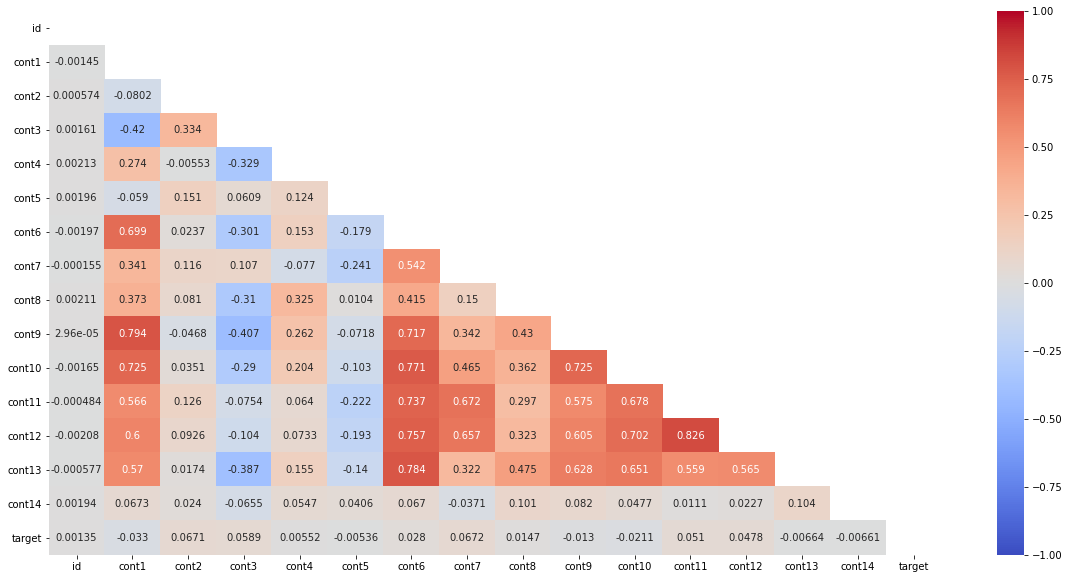

In [7]:
corr_mx = train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_mx, annot=True, cmap='coolwarm', fmt='0.3g', vmin=-1, vmax=1, mask=np.triu(corr_mx))

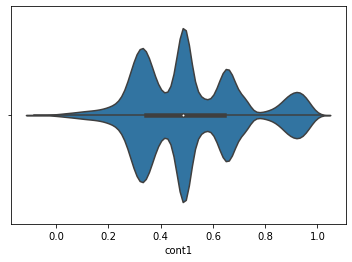

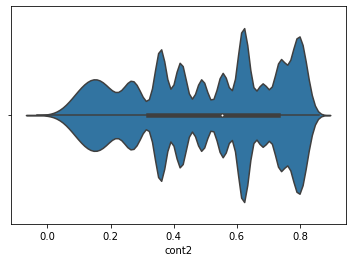

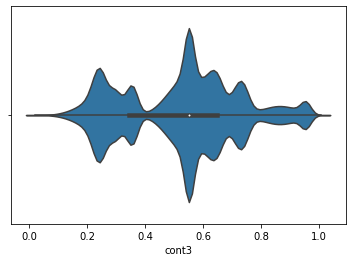

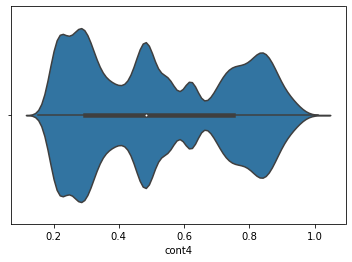

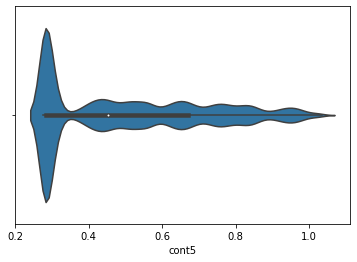

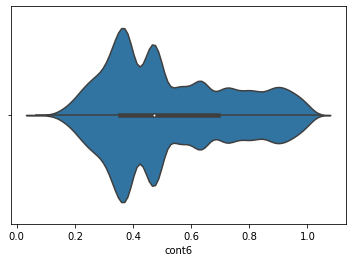

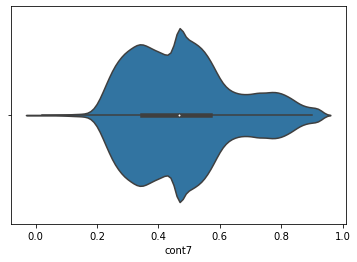

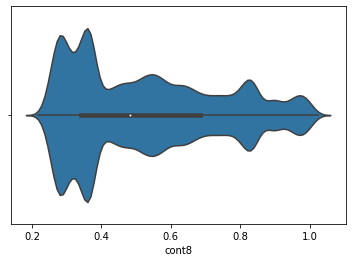

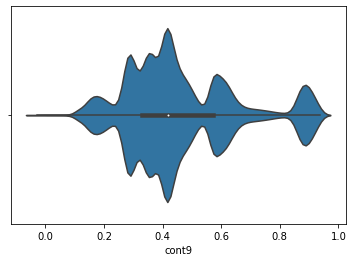

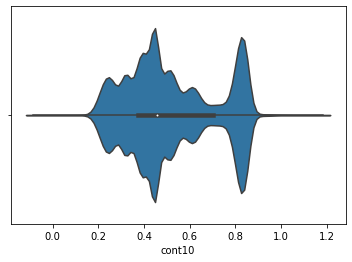

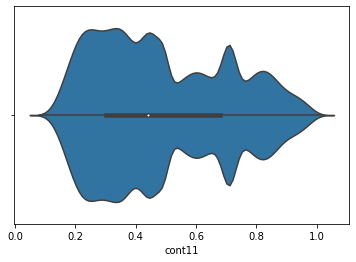

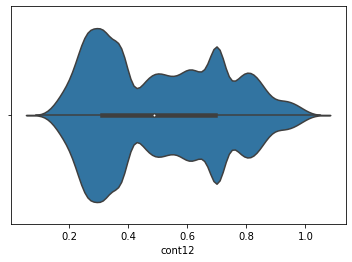

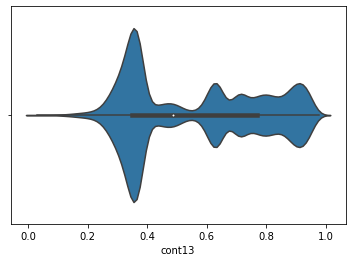

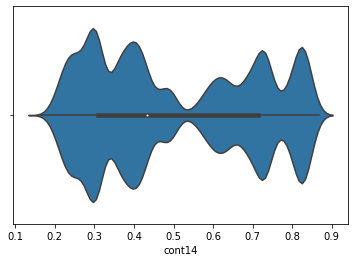

In [81]:
for col in cols_to_plot:
    #fig, axs = plt.subplots(1,3)
    plt.figure()
    sns.violinplot(x=train[col])

# Data transformations

In [86]:
# Cont5 is highly positively skewed
# Cont7 is left skewed
# Cont9 is left skewed
# cont10 is skewed on both sides
# cont13 slight left skew

In [76]:
from scipy.stats import skew
for col in train.columns:
    print(col, skew(train[col]))

cont1 0.5295749269846403
cont2 -0.24807872014869953
cont3 0.009036841596948527
cont4 0.25038210969940566
cont5 0.6103011873149119
cont6 0.5379730761633964
cont7 0.7034080336449035
cont8 0.5697249125097191
cont9 0.7962288898252089
cont10 0.3625991483805354
cont11 0.4193866561237977
cont12 0.28317219223510326
cont13 0.3203478976805978
cont14 0.2525469043355449
target -0.07739858181096672


In [11]:
def replace_outliers(data):
    for col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
        median_ = data[col].median()
        data.loc[((data[col] < q1 - 1.5*iqr) | (data[col] > q3 + 1.5*iqr)), col] = median_
    return data

In [12]:
train = replace_outliers(train)
test = replace_outliers(test)

In [8]:
sns.displot(x=train['target'])

NameError: name 'sns' is not defined

In [58]:
#train = train.drop(columns='cont5')

In [68]:
#new_cols = train.columns

In [ ]:
#for i in range(len(new_cols)):
   # print(new_cols[i], feature_importances[i])

# Model Training

In [13]:
train.drop(columns='target', inplace=True)
#test.drop(columns=['id'], inplace=True)

In [14]:
X = train.copy()

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

## Linear regression

In [243]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [244]:
#from sklearn.model_selection import cross_val_score
lin_reg_score = cross_val_score(lin_reg,X, y, cv=5, scoring='neg_root_mean_squared_error')
lin_reg_score.mean()

-0.7262363905572095

In [245]:
lin_reg_pred = lin_reg.predict(test)

In [246]:
lin_reg_sub = pd.DataFrame()
lin_reg_sub['id'] = test_id
lin_reg_sub['target'] = lin_reg_pred

In [247]:
lin_reg_sub.to_csv(os.path.join(pwd,'data','predictions','lin_reg.csv'), index=False)

## Ridge regresssion

In [248]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=100)
ridge.fit(X, y)

Ridge(alpha=100)

In [249]:
#from sklearn.model_selection import cross_val_score
ridge_reg_score = cross_val_score(ridge, X, y, cv=5, scoring='neg_root_mean_squared_error')
ridge_reg_score.mean()

-0.726239794724729

In [250]:
ridge_pred = ridge.predict(test)

In [251]:
ridge_sub = pd.DataFrame()
ridge_sub['id'] = test_id
ridge_sub['target'] = ridge_pred

In [252]:
ridge_sub.to_csv(os.path.join(pwd,'data','predictions','ridge.csv'), index=False)

## Lasso Regression

In [278]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0015)
lasso.fit(X, y)

Lasso(alpha=0.0015)

In [279]:
#from sklearn.model_selection import cross_val_score
lasso_reg_score = cross_val_score(lasso, X, y, cv=5,scoring='neg_root_mean_squared_error')
lasso_reg_score.mean()

-0.7270380113790695

In [255]:
lasso_pred = lasso.predict(test)

In [256]:
lasso_sub = pd.DataFrame()
lasso_sub['id'] = test_id
lasso_sub['target'] = lasso_pred

In [257]:
lasso_sub.to_csv(os.path.join(pwd,'data','predictions','lasso.csv'), index=False)

## Elastic net

In [258]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X, y)

ElasticNet()

In [259]:
#from sklearn.model_selection import cross_val_score
elastic_net_score = cross_val_score(elastic_net, X, y, cv = 5, scoring='neg_root_mean_squared_error')
elastic_net_score.mean()

-0.7330691414275544

In [260]:
elastic_net_pred = elastic_net.predict(test)

In [261]:
elastic_net_sub = pd.DataFrame()
elastic_net_sub['id'] = test_id
elastic_net_sub['target'] = elastic_net_pred

In [262]:
elastic_net_sub.to_csv(os.path.join(pwd,'data','predictions','elastic_net.csv'), index=False)

## Decision tree regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_split=32, min_samples_leaf=64, max_features='sqrt', max_depth=500, random_state=42)
dtr.fit(X, y)

DecisionTreeRegressor(max_depth=500, max_features='sqrt', min_samples_leaf=64,
                      min_samples_split=32, random_state=42)

In [59]:
dtr_score = cross_val_score(dtr, X, y, cv=3, scoring='neg_root_mean_squared_error')
dtr_score.mean()

-0.7308348371148629

In [60]:
dtr_pred = dtr.predict(test)

In [62]:
dtr_sub = pd.DataFrame()
dtr_sub['id'] = test_id
dtr_sub['target'] = dtr_pred

In [63]:
dtr_sub.to_csv(os.path.join('data','predictions','dtr.csv'), index=False)

## Random forest regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor
rnf_reg = RandomForestRegressor(min_samples_split=50, min_samples_leaf=100, n_estimators=10, max_features='sqrt', random_state=42, verbose=2)
#maybe = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, verbose=2, n_jobs=2)
rnf_reg.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.9s finished


RandomForestRegressor(max_features='sqrt', min_samples_leaf=100,
                      min_samples_split=50, n_estimators=10, random_state=42,
                      verbose=2)

In [89]:
rnf_reg_score = cross_val_score(rnf_reg, X, y, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
rnf_reg_score.mean()

-0.7094859204203678

In [70]:
importance = rnf_reg.feature_importances_
for i in range(len(cols[1:15])):
    print(cols[i+1], end=' ')
    print(importance[i])

cont1 0.08635510919352347
cont2 0.08948782253891713
cont3 0.10179047793023972
cont4 0.09667010870941092
cont5 0.04082067669348742
cont6 0.06671934703611111
cont7 0.068234178811983
cont8 0.04767846319044107
cont9 0.05574546865005022
cont10 0.06323964533605109
cont11 0.06793144531619015
cont12 0.066234913778906
cont13 0.09791993284711126
cont14 0.05117240996757744


In [69]:
rnf_reg_pred = rnf_reg.predict(test)

In [70]:
rnf_reg_sub = pd.DataFrame()
rnf_reg_sub['id'] = test_id
rnf_reg_sub['target'] = rnf_reg_pred

In [71]:
rnf_reg_sub.to_csv(os.path.join('data','predictions','rnf_reg.csv'), index=False)

## Stochastic gradient regressor

In [37]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(alpha=0.001, penalty='elasticnet', max_iter=1000, learning_rate='adaptive', random_state=42, tol=0.0001, l1_ratio=0.3)
sgd_reg.fit(X, y)

SGDRegressor(alpha=0.001, l1_ratio=0.3, learning_rate='adaptive',
             penalty='elasticnet', random_state=42, tol=0.0001)

In [38]:
sgd_reg_score = cross_val_score(sgd_reg, X, y, cv=5, scoring='neg_root_mean_squared_error')
sgd_reg_score.mean()

-0.7263247037753434

In [39]:
sgd_reg_pred = sgd_reg.predict(test)

In [40]:
sgd_reg_sub = pd.DataFrame()
sgd_reg_sub['id'] = test_id
sgd_reg_sub['target'] = sgd_reg_pred

In [41]:
sgd_reg_sub.to_csv(os.path.join('data','predictions','sgd_reg.csv'), index=False)

## Xgboost regressor

In [40]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=1000, 
                       learning_rate=0.05, 
                       subsample=0.5, 
                       reg_lambda=0, 
                       reg_alpha=0.1, 
                       seed=42)

In [17]:
params = {
    'n_estimators' : [100,200,500],
    'learning_rate' : [0.005,0.01,0.05,0.1],
    'reg_alpha' : [0.0,0.1,0.3],
    'reg_lambda' : [0.0,0.1,0.3],
    'subsample' : [0.25,0.5,0.75]
}
reg = RandomizedSearchCV(xgb_reg, params, random_state=42, n_iter=20, verbose=2)

In [18]:
#search = reg.fit(X, y)
search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END learning_rate=0.01, n_estimators=200, reg_alpha=0.3, reg_lambda=0.3, subsample=0.25; total time=  15.5s
[CV] END learning_rate=0.01, n_estimators=200, reg_alpha=0.3, reg_lambda=0.3, subsample=0.25; total time=  15.3s
[CV] END learning_rate=0.01, n_estimators=200, reg_alpha=0.3, reg_lambda=0.3, subsample=0.25; total time=  15.4s
[CV] END learning_rate=0.01, n_estimators=200, reg_alpha=0.3, reg_lambda=0.3, subsample=0.25; total time=  15.4s
[CV] END learning_rate=0.01, n_estimators=200, reg_alpha=0.3, reg_lambda=0.3, subsample=0.25; total time=  15.7s
[CV] END learning_rate=0.01, n_estimators=200, reg_alpha=0.0, reg_lambda=0.0, subsample=0.25; total time=  16.1s
[CV] END learning_rate=0.01, n_estimators=200, reg_alpha=0.0, reg_lambda=0.0, subsample=0.25; total time=  15.9s
[CV] END learning_rate=0.01, n_estimators=200, reg_alpha=0.0, reg_lambda=0.0, subsample=0.25; total time=  16.0s
[CV] END learning_rate=0.01, n_est

{'subsample': 0.5,
 'reg_lambda': 0.0,
 'reg_alpha': 0.1,
 'n_estimators': 500,
 'learning_rate': 0.05}

In [41]:
xgb_reg.fit(X, y)

[17:36:09] WARNING: ../src/learner.cc:573: 
Parameters: { "colsamply_bytree" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, colsamply_bytree=0.7,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=6,
             num_parallel_tree=1, random_state=42, reg_alpha=0.1, reg_lambda=0,
             scale_pos_weight=1, seed=42, subsample=0.5, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
xgb_reg_score = cross_val_score(xgb_reg, X, y, cv=3, scoring='neg_root_mean_squared_error', verbose=3)
xgb_reg_score.mean()

In [66]:
feature_importances = xgb_reg.feature_importances_

In [42]:
xgb_reg_pred = xgb_reg.predict(test)

In [43]:
xgb_reg_sub = pd.DataFrame()
xgb_reg_sub['id'] = test_id
xgb_reg_sub['target'] = xgb_reg_pred

In [44]:
xgb_reg_sub.to_csv(os.path.join('data','predictions','xgb_reg.csv'), index=False)